In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
##Linear Regression with one feature

In [16]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
Y = 2*X +5

In [22]:
print(X)
print(Y)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[ 7]
 [ 9]
 [11]
 [13]
 [15]]


In [4]:
obj = LinearRegression()

In [5]:
dir(obj)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

In [17]:
model = obj.fit(X,Y)

In [10]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [18]:
model.score(X,Y)

1.0

In [20]:
model.intercept_

array([5.])

In [21]:
model.coef_

array([[2.]])

In [23]:
newData = np.array([[30]])
model.predict(newData)

array([[65.]])

In [24]:
newData = np.array([[-1]])
model.predict(newData)

array([[3.]])

In [28]:
X = np.array([[1,1],[1,2],[2,2],[2,3]])
Y = np.dot(X,np.array([2,3]))+5

In [29]:
print(X)
print(Y)

[[1 1]
 [1 2]
 [2 2]
 [2 3]]
[10 13 15 18]


In [31]:
obj = LinearRegression()
model = obj.fit(X,Y)

In [32]:
model.score(X,Y)

1.0

In [33]:
model.coef_

array([2., 3.])

In [34]:
model.intercept_

5.000000000000002

In [35]:
newData = np.array([[3,5]])

In [36]:
model.predict(newData)

array([26.])

In [38]:
#Import libraries
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
#from scipy.interpolate import spline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

# Simple Regression

In [39]:
regression_data = pandas.read_csv('./data/simple_regression_data.csv')

In [40]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  1000 non-null   float64
 1   Price   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


This data contains volume and price of a metal taken by differennt vendors at different time

In [42]:
#Check initial data
regression_data.head()

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909


<b>First we plot the data</b>

Text(0.5, 1.0, 'Price  - Volume Data')

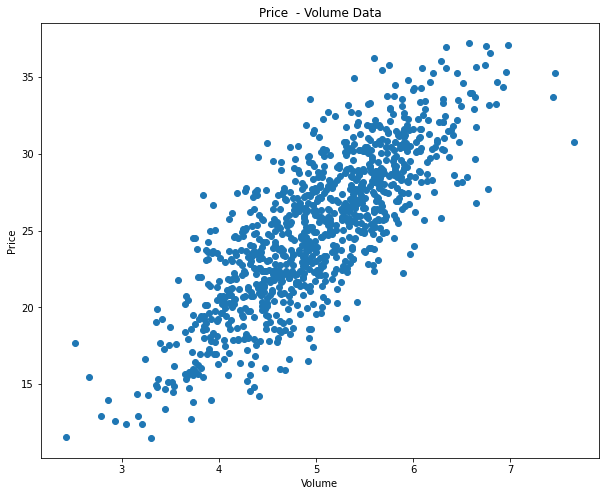

In [44]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price  - Volume Data')

In [45]:
#Divide the data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(regression_data['Volume'],regression_data['Price'],test_size=0.20)

In [46]:
?train_test_split

In [67]:
simple_linear_regression = LinearRegression()

#Train the model

simple_linear_regression.fit(pandas.DataFrame(X_train),pandas.DataFrame(Y_train))

#Make prediction
Y_pred = simple_linear_regression.predict(pandas.DataFrame(X_test))

In [68]:
print(simple_linear_regression.score)

<bound method RegressorMixin.score of LinearRegression()>


In [69]:
?LinearRegression.score

In [70]:
simple_linear_regression.intercept_

array([-0.2761491])

In [71]:
simple_linear_regression.coef_

array([[5.06469174]])

In [72]:
print("Mean squared error:%.1f" %mean_squared_error(Y_test,Y_pred))

Mean squared error:9.7


In [73]:
print("R2 Score: %.2f" %r2_score(Y_test,Y_pred))

R2 Score: 0.63


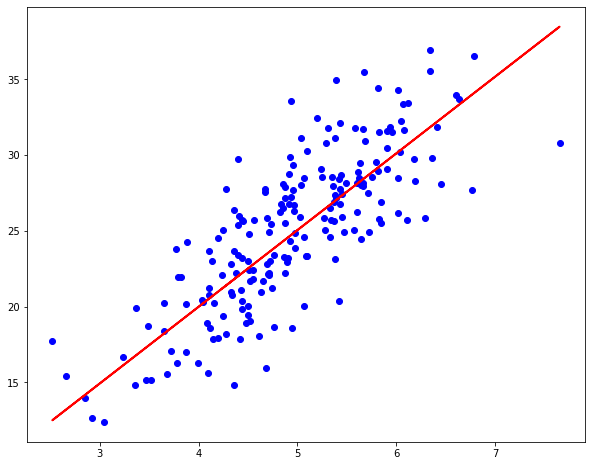

In [77]:
plt.scatter(X_test,Y_test,color="blue")
plt.plot(X_test,Y_pred,color="red",linewidth=2)